# Predicción a estrellas BeSOS

### Gestión de dependencias: instalación y verificación de paquetes

In [1]:
import importlib
import subprocess

librerias_requeridas = ['numpy', 'matplotlib', 'pandas', 'seaborn']

for lib in librerias_requeridas:
    try:
        importlib.import_module(lib)
        print(f'{lib} ya está instalada.')
    except ImportError:
        print(f'{lib} no está instalada. Instalando {lib}...')
        subprocess.check_call(['pip3', 'install', lib])

import numpy as np
import matplotlib.pyplot as plt

import multiprocessing
import pandas as pd
import pickle

import seaborn as sns
sns.set_theme(style="whitegrid")

numpy ya está instalada.
matplotlib ya está instalada.
pandas ya está instalada.
seaborn ya está instalada.


### Carga de modelo

In [2]:
modelo_archivo = 'Multi-Output-RF'

with open(modelo_archivo, 'rb') as f:
    model = pickle.load(f)
    print("Modelo", modelo_archivo ,"si existe")

Modelo Multi-Output-RF si existe


### Predicciones

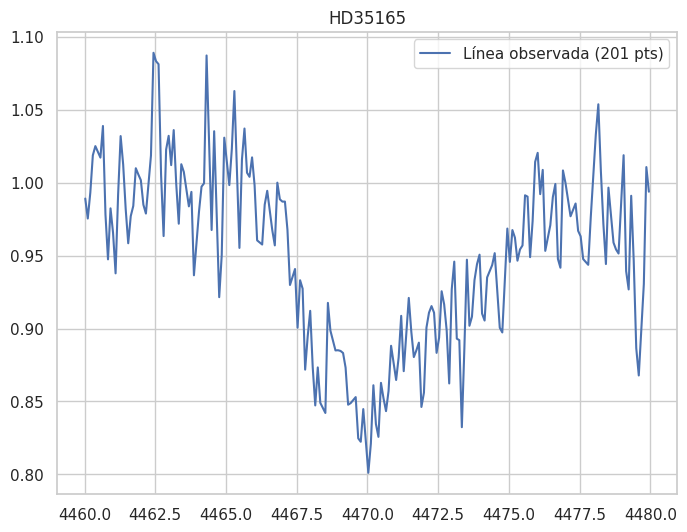

Parámetros estelares obtenidos mediante predicción - estrella HD35165

Teff:  27.114
Log(g):  4.07
Vroot:  281


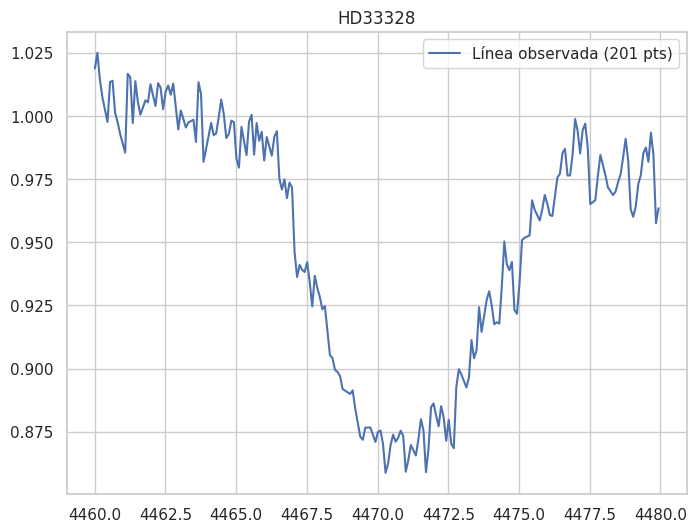

Parámetros estelares obtenidos mediante predicción - estrella HD33328

Teff:  30.145
Log(g):  3.55
Vroot:  286


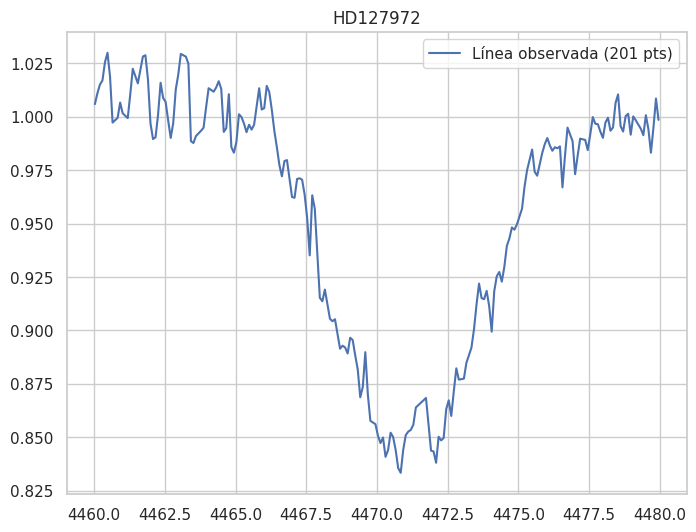

Parámetros estelares obtenidos mediante predicción - estrella HD127972

Teff:  33.080
Log(g):  3.65
Vroot:  229


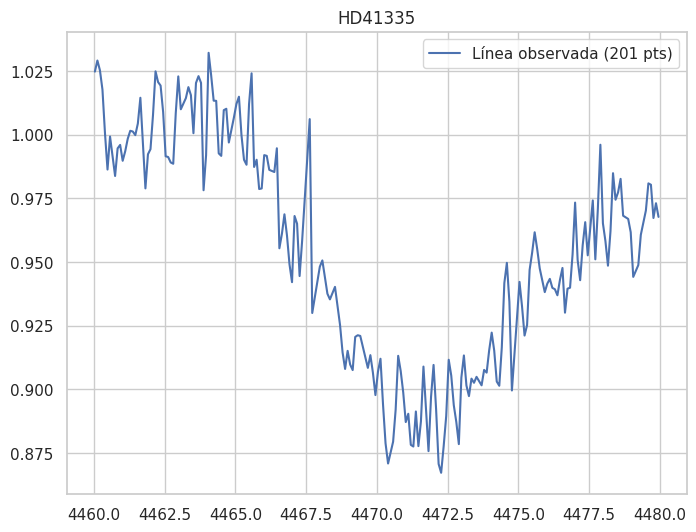

Parámetros estelares obtenidos mediante predicción - estrella HD41335

Teff:  28.548
Log(g):  3.64
Vroot:  351


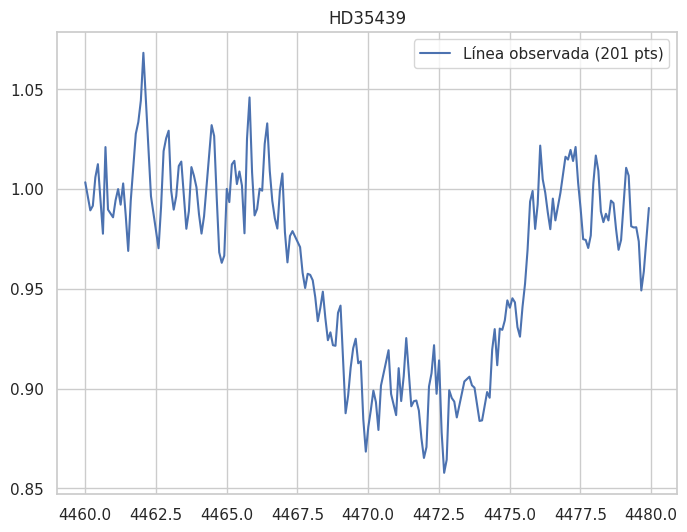

Parámetros estelares obtenidos mediante predicción - estrella HD35439

Teff:  27.700
Log(g):  3.95
Vroot:  274


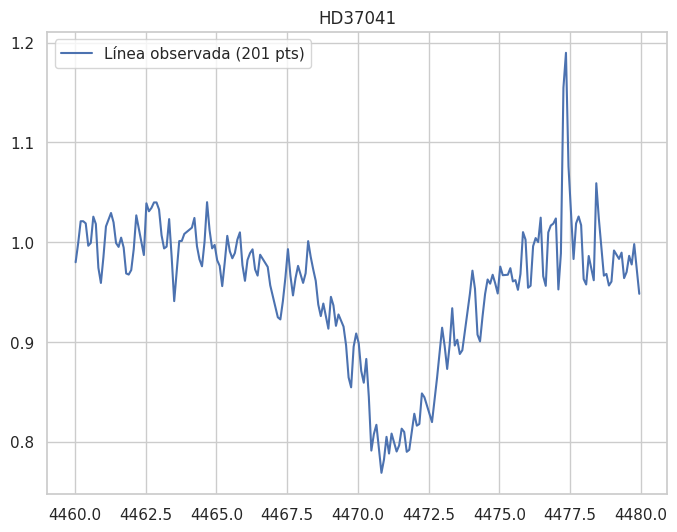

Parámetros estelares obtenidos mediante predicción - estrella HD37041

Teff:  28.297
Log(g):  3.63
Vroot:  169


,Estrella,Teff_real,Teff_pred,Error_Teff,logg_real,logg_pred,Error_Log_g,vroot_real,vroot_pred,Error_Vrot
0,HD35165,17.000,27.114,59.5,4.00,4.07,1.8,240,281,17.1
1,HD33328,19.526,30.145,54.4,3.30,3.55,7.6,287,286,0.3
2,HD127972,21.000,33.080,57.5,3.95,3.65,7.6,240,229,4.6
3,HD41335,22.500,28.548,26.9,3.35,3.64,8.7,330,351,6.4
4,HD35439,25.300,27.700,9.5,4.79,3.95,17.5,260,274,5.4
5,HD37041,27.500,28.297,2.9,3.72,3.63,2.4,140,169,20.7


In [4]:
# Definición de funciones
def dif_absoluta(v_real,v_predict):
    return abs(v_real-v_predict)

def dif_porcentual(v_real, v_predict):
    return abs(((v_predict/v_real) * 100) - 100)

# Inicialización de dataframe de resultados
resultados = pd.DataFrame(columns=["Estrella", "Teff_real", "Teff_pred", "logg_real", "logg_pred", "vroot_real", "vroot_pred"])

# Lista de estrellas y sus parámetros
stars = [('HD35165','HD35165_2015-11-14_04-22-43_final_corr',17000,4.00,240), #habian 2 archivos
         ('HD33328','hd33328_2013-02-26_00-55-34_final_corr',19526,3.30,287),      
         ('HD127972','hd127972_2014-01-31_07-43-08_final_corr',21000,3.95,240),
         ('HD41335','hd41335_2013-02-26_01-46-17_final_corr',22500,3.35,330),
         ('HD35439','HD35439_2015-02-25_00-02-51_final_corr',25300,4.79,260),
         ('HD37041','hd37041_2014-01-29_03-58-58_final_corr',27500,3.72,140), #habian 2 archivos
         ]
#('HD110335','hd110335_2014-01-30_07-02-46_final_corr',10600,2.90,) no tiene rotacion
#('HD35411','HD35411_2015-02-25_01-36-00_final_corr',25900,4.50,53) no tiene rango en vrot

for star in stars:
    name,name_long, Teff_real, logg_real, vroot_real = star

    # Carga del dataset
    df = pd.read_csv(f"../BESOS/2_Be_stars/{name}/{name_long}.txt", sep="\t", header=None)

    # Selección de datos
    df2 = df[(df[0] >= 4460) & (df[0] <= 4480)]

    n = 201  # for 2 random indices
    index = np.random.choice(df2.index, n, replace=False)
    df2 = df2.loc[index].sort_index()

    obs_wave = df2[0]
    obs_flux = df2[1]

    # Plot
    plt.figure(figsize=(8,6))
    plt.title(name)
    plt.plot(obs_wave, obs_flux, label="Línea observada (201 pts)")
    plt.legend(loc="best")
    plt.show()

    # Predicción
    pred_obs = model.predict(obs_flux.values.reshape(1,201))

    # Impresión de resultados
    Teff_pred=round(pred_obs[0,0])
    logg_pred=round(pred_obs[0,1],2)
    vroot_pred=round(pred_obs[0,2])
    print(f"Parámetros estelares obtenidos mediante predicción - estrella {name}\n")
    print("Teff: ",format(Teff_pred, ',').replace(",", "X").replace(".", ",").replace("X", "."))
    print("Log(g): ",logg_pred)
    print("Vroot: ",vroot_pred)

    #print("Temperatura efectiva (Teff)\n")
    #print("\tDiferencia Absoluta: ",dif_absoluta(Teff_real,pred_obs_inv[0,0]))
    #print("\tDiferencia porcentual: ",dif_porcentual(Teff_real,pred_obs_inv[0,0]) , "%")

    #print("\nGravedad superficial (Log g)\n")
    #print("\tDiferencia Absoluta: ",dif_absoluta(logg_real,pred_obs_inv[0,1]))
    #print("\tDiferencia porcentual: ",dif_porcentual(logg_real,pred_obs_inv[0,1]), "%")

    #print("\nVelocidad de rotación (Vroot)\n")
    #print("\tDiferencia Absoluta: ",dif_absoluta(vroot_real,pred_obs_inv[0,2]))
    #print("\tDiferencia porcentual: ",dif_porcentual(vroot_real,pred_obs_inv[0,2]), "%")

    # Agregar a resultados
    resultados_temp = pd.DataFrame({"Estrella": [name], 
                                    "Teff_real": [format(Teff_real, ',').replace(",", "X").replace(".", ",").replace("X", ".")], 
                                    "Teff_pred": [format(Teff_pred, ',').replace(",", "X").replace(".", ",").replace("X", ".")], 
                                    "Error_Teff": [f'{dif_porcentual(Teff_real,Teff_pred):.1f}'],
                                    "logg_real": [logg_real], 
                                    "logg_pred": [logg_pred], 
                                    "Error_Log_g": [f'{dif_porcentual(logg_real,logg_pred):.1f}'],
                                    "vroot_real": [vroot_real], 
                                    "vroot_pred": [vroot_pred],
                                    "Error_Vrot": [f'{dif_porcentual(vroot_real,vroot_pred):.1f}']})


    resultados = pd.concat([resultados, resultados_temp], ignore_index=True)
    # Especifica el orden de las columnas
    column_order = ["Estrella", "Teff_real", "Teff_pred", "Error_Teff", "logg_real", "logg_pred", "Error_Log_g", "vroot_real", "vroot_pred", "Error_Vrot"]

    # Reordena las columnas
    resultados = resultados[column_order]

resultados

In [10]:
#ERRORES GLOBALES
resultados['Error_Teff'] = pd.to_numeric(resultados['Error_Teff'])
resultados['Error_Log_g'] = pd.to_numeric(resultados['Error_Log_g'])
resultados['Error_Vrot'] = pd.to_numeric(resultados['Error_Vrot'])

error_promedio_Teff = resultados['Error_Teff'].mean()
error_promedio_Logg = resultados['Error_Log_g'].mean()
error_promedio_Vrot = resultados['Error_Vrot'].mean()

print("Error promedio en Teff :", round(error_promedio_Teff),'%')
print("Error promedio en Logg :", round(error_promedio_Logg),'%')
print("Error promedio en Vrot :", round(error_promedio_Vrot),'%')

Error promedio en Teff : 35 %
Error promedio en Logg : 8 %
Error promedio en Vrot : 9 %
